In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-16 16:42:32,778 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-16 16:42:32,778 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-16 16:42:32,779 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-16 16:42:32,779 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-16 16:42:32,779 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def spec(ray_, lmin, lmax, dlam=0.001, line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(len(ray_)):
        ray = ray_[i]

        sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)

        if DIY==True:

            DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
            sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                    identifier=DIY_line)

            sg.make_spectrum(ray, lines=[DIY_line])
            sg.save_spectrum('spec.txt')

        else:
            sg.make_spectrum(ray, lines=[line])
            sg.save_spectrum('spec.txt')
            
        f = np.loadtxt('spec.txt')
        lam = f[:,0] # All rows, 1st column
        flux = f[:,2]

        tog = np.array([lam, flux])
        arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))
    color_= ['deeppink', 'orangered', 'teal', 'mediumblue', 'black']
    fig = plt.figure(figsize=(15, 5))
    
    for j in range(len(ray_)):
        plt.plot(arrays[0][0], arrays[j][1], color=color_[j], label='Ray '+str(j+1), alpha=0.85-(int(j)/10))
    plt.xlim(lmin, lmax)
    if DIY==False:
        plt.title(line+" '140.h5.0' (d$\lambda$ = " + str(dlam)+")", fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+" '140.h5.0' (d$\lambda$ = " + str(dlam)+")", fontsize=14)
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)

    return arrays

In [5]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.2524, 0.33, 0, 1.2524, 0.48, 1, 2)
ray3 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray4 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)
ray5 = make_ray(0,0.11,0, 2, 0.96, 0.8,5)

yt : [INFO     ] 2022-06-16 16:42:33,196 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-06-16 16:42:33,199 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-16 16:42:33,874 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-06-16 16:42:33,970 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-16 16:42:33,970 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-16 16:42:33,971 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-16 16:42:33,971 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

In [6]:
rays = [ray1,ray2,ray3,ray4,ray5]

# Ly a

yt : [INFO     ] 2022-06-15 23:17:29,868 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:17:29,881 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 146.20it/s] 
yt : [INFO     ] 2022-06-15 23:17:31,682 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-15 23:17:31,682 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:17:31,847 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:17:31,849 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 294/294 [00:00<00:00, 2361.75it/s]
yt : [INFO     ] 2022-06-15 23:17:32,003 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-15 23:17:32,003 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:17:32,213 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:17:32,216 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|

[array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.909983e-01, 9.909956e-01, 9.909929e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.964224e-01, 9.964213e-01, 9.964202e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.989357e-01, 9.989353e-01, 9.989350e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [1.000000e+0

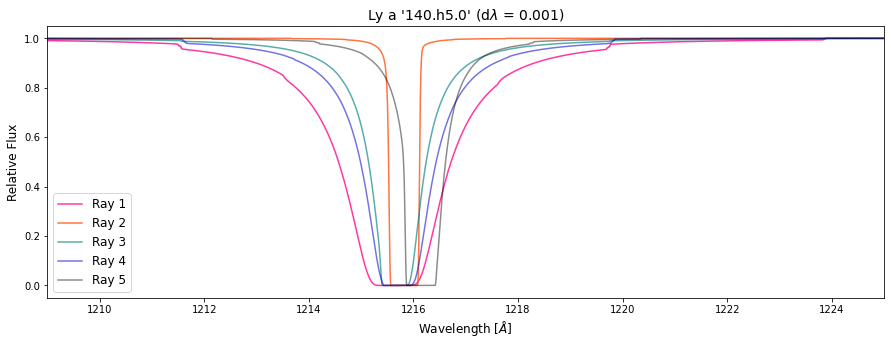

In [28]:
spec(ray_=rays, lmin=1209, lmax=1225, line='Ly a')

# Si

## Si II 1526

yt : [INFO     ] 2022-06-15 23:15:30,246 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:15:30,257 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:15:30,312 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2891.58it/s]
yt : [INFO     ] 2022-06-15 23:15:30,433 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:15:30,475 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:15:30,478 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:15:30,481 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 14093.83it/s]
yt : [INFO     ] 2022-06-15 23:15:30,531 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:15:30,574 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:15:30,577 Creating Si_p1_number_density from ray

[array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+0

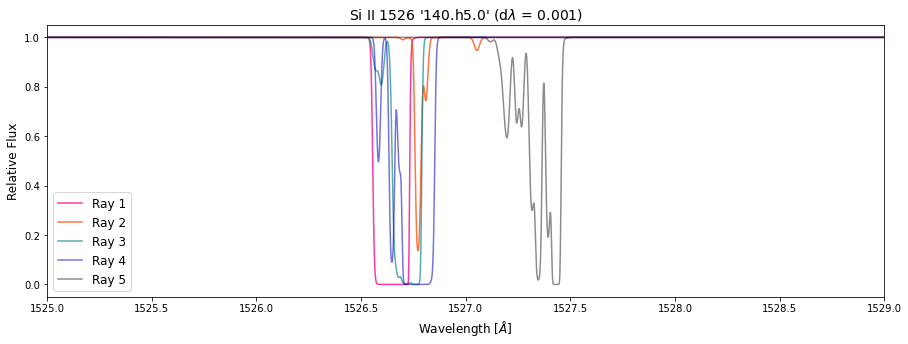

In [26]:
spec(rays, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True)

yt : [INFO     ] 2022-06-15 23:16:23,625 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:16:23,638 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2735.63it/s]
yt : [INFO     ] 2022-06-15 23:16:23,782 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:16:23,804 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:16:23,807 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 13706.88it/s]
yt : [INFO     ] 2022-06-15 23:16:23,858 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:16:23,880 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:16:23,883 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10651.57it/s]
yt : [INFO     ] 2022-06-15 23:16:23,935 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:16:23,958 Setting instrument to Custom
yt :

[array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+0

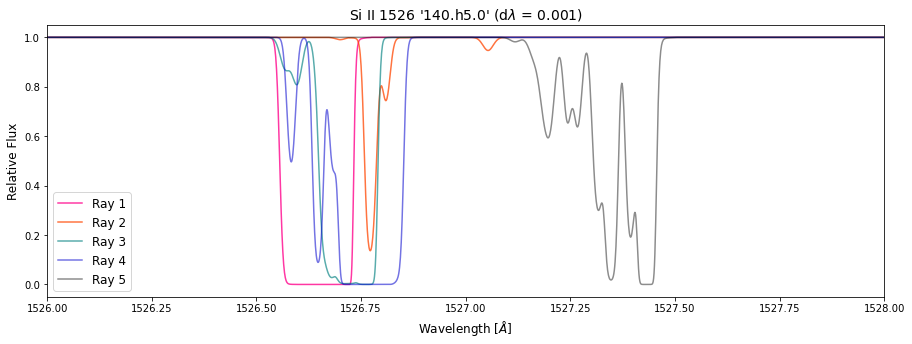

In [27]:
spec(rays, 1526, 1528, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True)

## Si III 1206

yt : [INFO     ] 2022-06-15 23:20:13,475 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:13,486 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2933.53it/s]
yt : [INFO     ] 2022-06-15 23:20:13,712 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:13,755 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:13,758 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10822.30it/s]
yt : [INFO     ] 2022-06-15 23:20:13,842 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:13,886 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:13,889 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9386.84it/s]
yt : [INFO     ] 2022-06-15 23:20:13,972 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:14,015 Setting instrument to Custom
yt

[array([[1.205500e+03, 1.205501e+03, 1.205502e+03, ..., 1.209498e+03,
         1.209499e+03, 1.209500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.205500e+03, 1.205501e+03, 1.205502e+03, ..., 1.209498e+03,
         1.209499e+03, 1.209500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.205500e+03, 1.205501e+03, 1.205502e+03, ..., 1.209498e+03,
         1.209499e+03, 1.209500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.205500e+03, 1.205501e+03, 1.205502e+03, ..., 1.209498e+03,
         1.209499e+03, 1.209500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.205500e+03, 1.205501e+03, 1.205502e+03, ..., 1.209498e+03,
         1.209499e+03, 1.209500e+03],
        [1.000000e+0

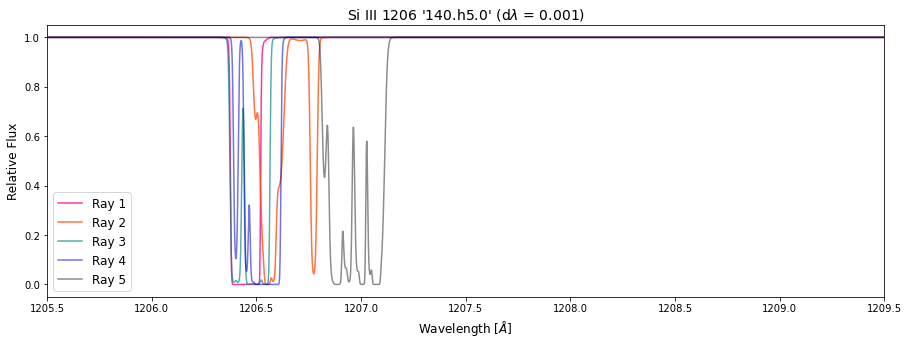

In [30]:
spec(rays, 1205.5, 1209.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, dlam=0.001)

yt : [INFO     ] 2022-06-15 23:20:37,303 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:37,317 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2967.05it/s]
yt : [INFO     ] 2022-06-15 23:20:37,540 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:37,558 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:37,561 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11004.94it/s]
yt : [INFO     ] 2022-06-15 23:20:37,644 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:37,662 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:20:37,664 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9518.90it/s]
yt : [INFO     ] 2022-06-15 23:20:37,748 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:20:37,765 Setting instrument to Custom
yt

[array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+0

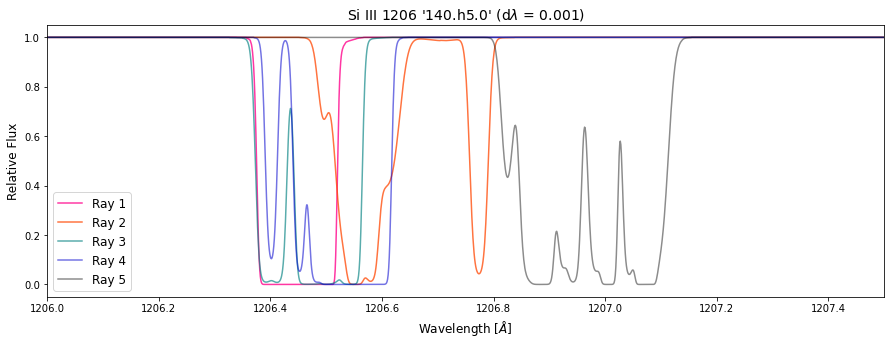

In [31]:
spec(rays, 1206, 1207.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, dlam=0.001)

## Si IV 1393

yt : [INFO     ] 2022-06-15 23:21:42,229 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:21:42,240 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:21:42,277 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3623.96it/s]
yt : [INFO     ] 2022-06-15 23:21:42,384 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:21:42,426 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:21:42,429 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:21:42,432 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11895.29it/s]
yt : [INFO     ] 2022-06-15 23:21:42,486 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:21:42,529 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:21:42,532 Creating Si_p3_number_density from ray

[array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+0

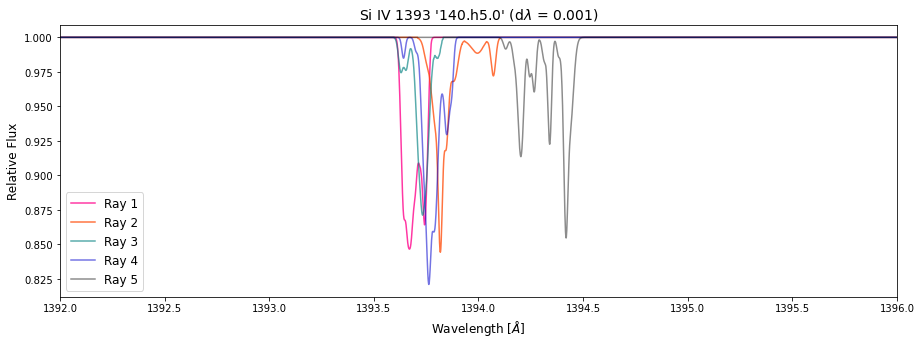

In [32]:
spec(rays, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, dlam=0.001)

# C

## C II 1334

yt : [INFO     ] 2022-06-15 23:26:25,307 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:26:25,319 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2646.98it/s]
yt : [INFO     ] 2022-06-15 23:26:25,467 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:26:25,510 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:26:25,513 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10350.05it/s]
yt : [INFO     ] 2022-06-15 23:26:25,573 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:26:25,616 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:26:25,619 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10113.42it/s]
yt : [INFO     ] 2022-06-15 23:26:25,673 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:26:25,715 Setting instrument to Custom
yt : [I

[array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+0

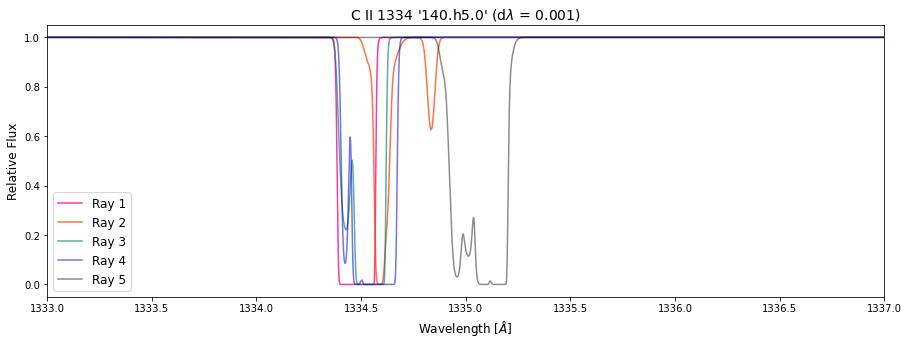

In [34]:
spec(rays, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True)

## C III 977

yt : [INFO     ] 2022-06-15 23:28:35,288 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:28:35,298 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:28:35,324 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2782.77it/s]
yt : [INFO     ] 2022-06-15 23:28:35,550 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:28:35,592 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:28:35,595 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:28:35,598 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 8806.40it/s]
yt : [INFO     ] 2022-06-15 23:28:35,693 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:28:35,736 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:28:35,738 Creating C_p2_number_density from ray's densi

[array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

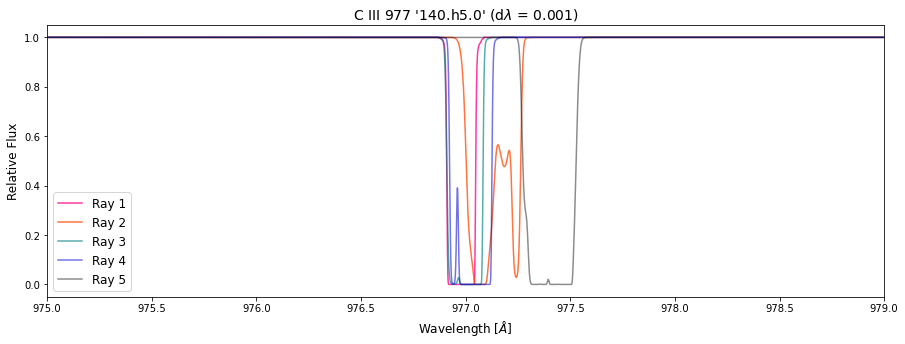

In [35]:
spec(rays, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, dlam=0.001)

yt : [INFO     ] 2022-06-15 23:31:00,255 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:00,266 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2792.97it/s]
yt : [INFO     ] 2022-06-15 23:31:00,509 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:31:00,533 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:00,536 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 9262.77it/s]
yt : [INFO     ] 2022-06-15 23:31:00,630 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:31:00,652 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:00,655 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8920.79it/s]
yt : [INFO     ] 2022-06-15 23:31:00,744 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:31:00,766 Setting instrument to Custom
yt : [INFO  

[array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

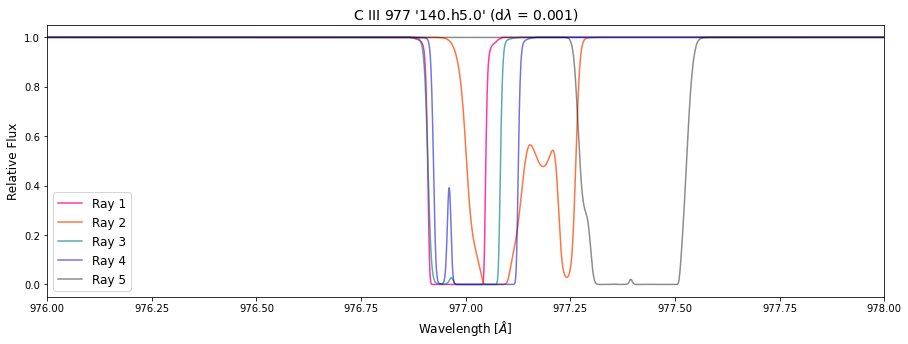

In [36]:
spec(rays, 976, 978, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, dlam=0.001)

## C IV 1548

yt : [INFO     ] 2022-06-15 23:31:42,402 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:42,413 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:31:42,448 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5801.69it/s]
yt : [INFO     ] 2022-06-15 23:31:42,585 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:31:42,618 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:42,621 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:31:42,623 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 294/294 [00:00<00:00, 5033.47it/s]
yt : [INFO     ] 2022-06-15 23:31:42,712 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:31:42,745 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:31:42,747 Creating C_p3_number_density from ray's den

[array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+0

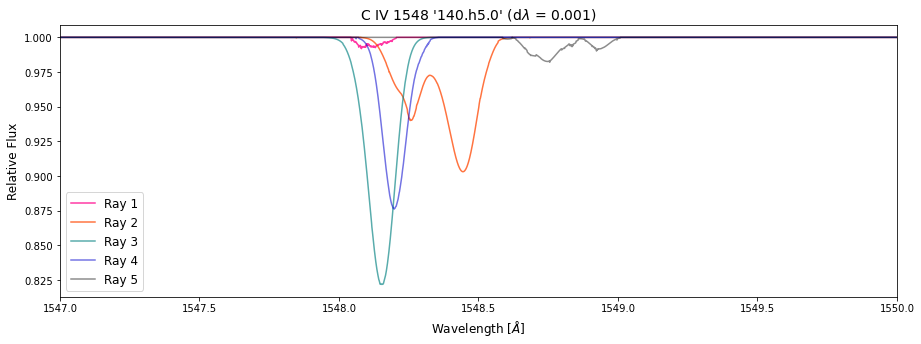

In [37]:
spec(rays, 1547,1550, line='C IV 1548', dlam=0.001)

# O

## O I 1302

yt : [INFO     ] 2022-06-15 23:33:44,282 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:33:44,293 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:33:44,332 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2757.31it/s]
yt : [INFO     ] 2022-06-15 23:33:44,461 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:33:44,504 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:33:44,507 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:33:44,510 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 16247.57it/s]
yt : [INFO     ] 2022-06-15 23:33:44,560 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:33:44,603 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:33:44,606 Creating O_number_density from ray's density, temp

[array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+0

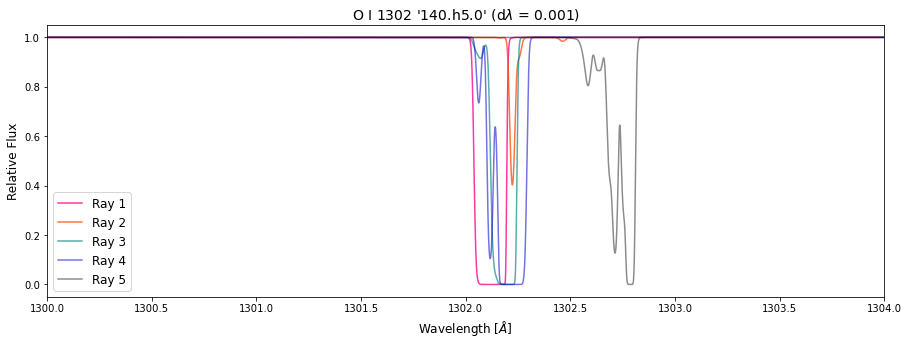

In [38]:
spec(rays, 1300, 1304, line='O I 1302')

yt : [INFO     ] 2022-06-15 23:34:12,851 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:34:12,862 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2711.75it/s]
yt : [INFO     ] 2022-06-15 23:34:13,006 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:34:13,029 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:34:13,032 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15755.77it/s]
yt : [INFO     ] 2022-06-15 23:34:13,083 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:34:13,107 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:34:13,109 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11157.03it/s]
yt : [INFO     ] 2022-06-15 23:34:13,161 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:34:13,183 Setting instrument to Custom
yt : [INFO

[array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+0

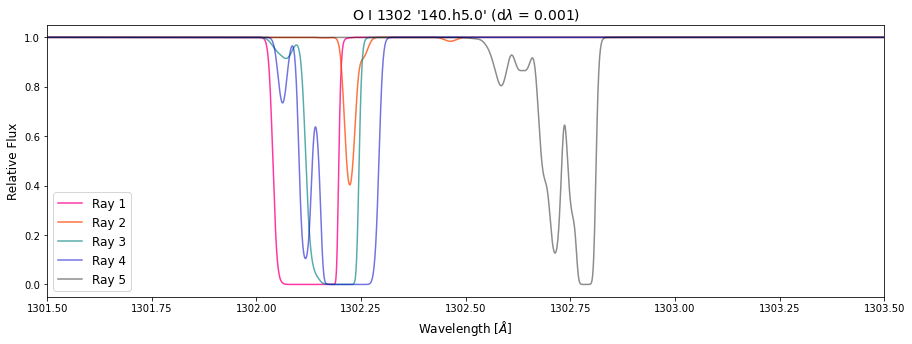

In [39]:
spec(rays, 1301.5, 1303.5, line='O I 1302')

## O II 702

yt : [INFO     ] 2022-06-15 23:39:48,100 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:39:48,113 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2980.83it/s]
yt : [INFO     ] 2022-06-15 23:39:48,338 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:39:48,381 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:39:48,384 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 294/294 [00:00<00:00, 10501.03it/s]
yt : [INFO     ] 2022-06-15 23:39:48,469 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:39:48,512 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:39:48,515 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9338.27it/s]
yt : [INFO     ] 2022-06-15 23:39:48,601 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:39:48,644 Setting instrument to Custom
yt : [INFO    

[array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

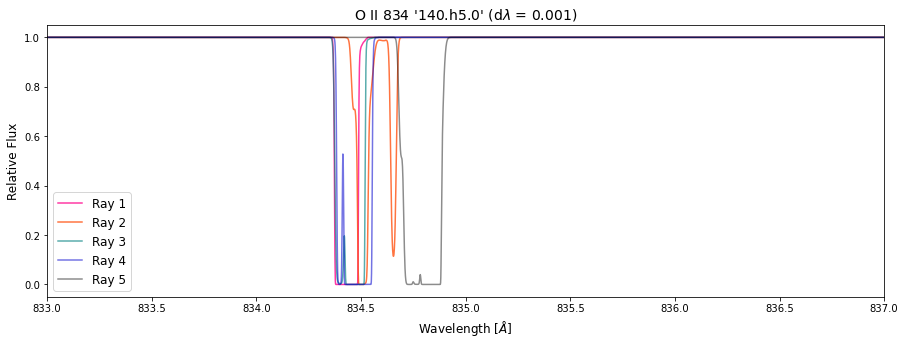

In [41]:
spec(rays, 833, 837, el='O', rom_num='II', lrest=834.4654,
    gamma=8.43E+08, f_value=1.32E-01, DIY=True)

yt : [INFO     ] 2022-06-15 23:40:28,497 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:40:28,511 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2996.40it/s]
yt : [INFO     ] 2022-06-15 23:40:28,736 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:40:28,748 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:40:28,752 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 294/294 [00:00<00:00, 10865.21it/s]
yt : [INFO     ] 2022-06-15 23:40:28,836 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:40:28,848 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:40:28,851 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9485.02it/s]
yt : [INFO     ] 2022-06-15 23:40:28,936 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:40:28,949 Setting instrument to Custom
yt : [INFO    

[array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

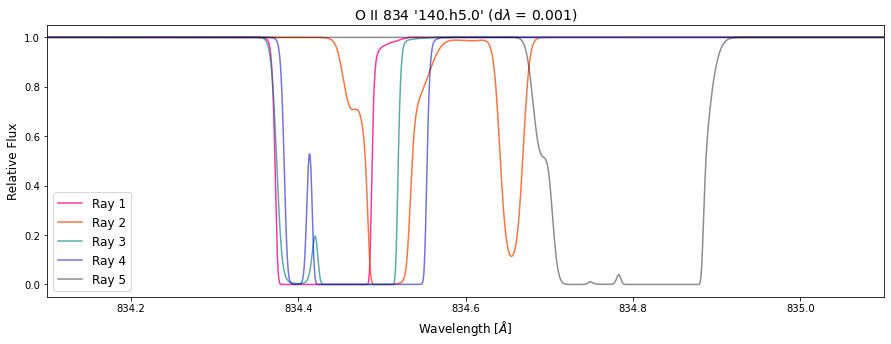

In [43]:
spec(rays, 834.1, 835.1, el='O', rom_num='II', lrest=834.4654,
    gamma=8.43E+08, f_value=1.32E-01, DIY=True)

## O III 702

yt : [INFO     ] 2022-06-15 23:55:38,111 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:55:38,123 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:55:38,157 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3925.30it/s]
yt : [INFO     ] 2022-06-15 23:55:38,325 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:55:38,367 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:55:38,370 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-15 23:55:38,373 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10487.63it/s]
yt : [INFO     ] 2022-06-15 23:55:38,461 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:55:38,506 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:55:38,508 Creating O_p2_number_density from ray's dens

[array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

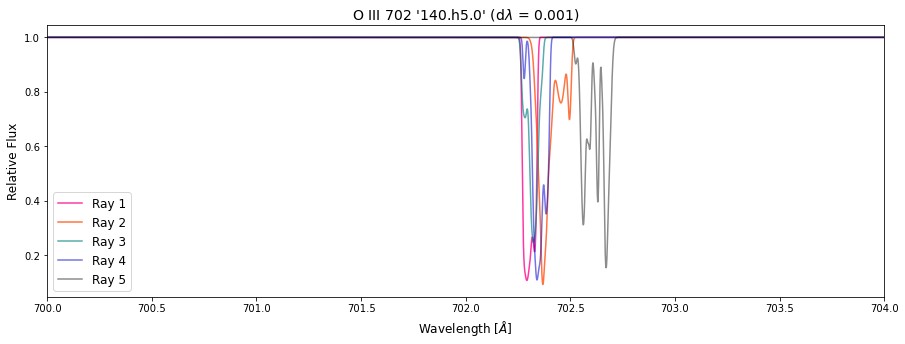

In [45]:
spec(rays, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True)

yt : [INFO     ] 2022-06-15 23:56:03,965 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:56:03,978 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3727.38it/s]
yt : [INFO     ] 2022-06-15 23:56:04,167 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:56:04,182 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:56:04,185 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10354.31it/s]
yt : [INFO     ] 2022-06-15 23:56:04,273 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:56:04,289 Setting instrument to Custom
yt : [INFO     ] 2022-06-15 23:56:04,293 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11044.11it/s]
yt : [INFO     ] 2022-06-15 23:56:04,371 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-15 23:56:04,386 Setting instrument to Custom
yt : [INFO

[array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

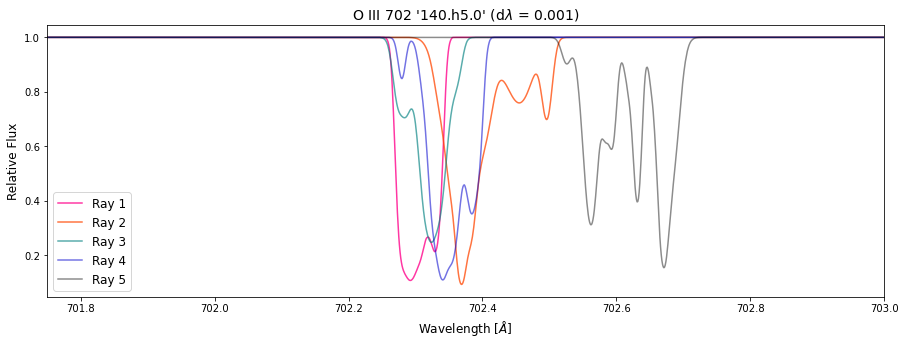

In [46]:
spec(rays, 701.75, 703, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True)

## O III 507

yt : [INFO     ] 2022-06-16 00:01:59,126 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:01:59,138 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 3984.07it/s]
yt : [INFO     ] 2022-06-16 00:01:59,246 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:01:59,291 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:01:59,294 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 294/294 [00:00<00:00, 11878.79it/s]
yt : [INFO     ] 2022-06-16 00:01:59,349 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:01:59,393 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:01:59,396 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 11836.04it/s]
yt : [INFO     ] 2022-06-16 00:01:59,448 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:01:59,492 Setting instrument to Custom
yt : [INFO

[array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

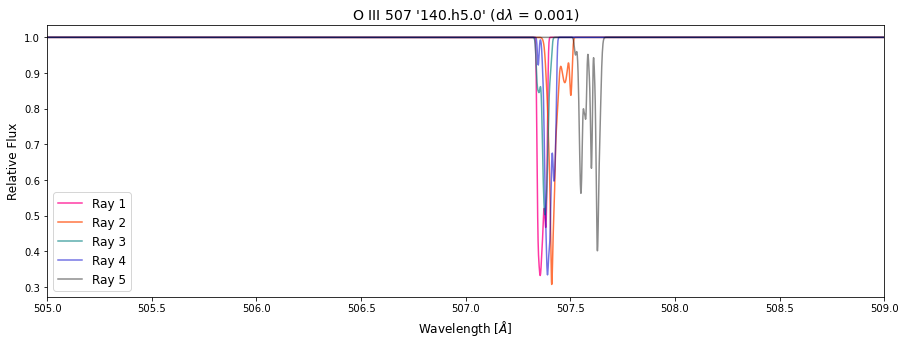

In [47]:
spec(rays, 505, 509, el='O', rom_num='III', lrest=507.3883,
    gamma=1.60E+09, f_value=1.85E-01, DIY=True)

yt : [INFO     ] 2022-06-16 00:03:23,776 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:03:23,787 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 3908.64it/s]
yt : [INFO     ] 2022-06-16 00:03:23,903 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:03:23,917 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:03:23,921 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 294/294 [00:00<00:00, 11133.81it/s]
yt : [INFO     ] 2022-06-16 00:03:23,981 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:03:23,994 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:03:23,997 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 11951.45it/s]
yt : [INFO     ] 2022-06-16 00:03:24,049 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:03:24,062 Setting instrument to Custom
yt : [INFO

[array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

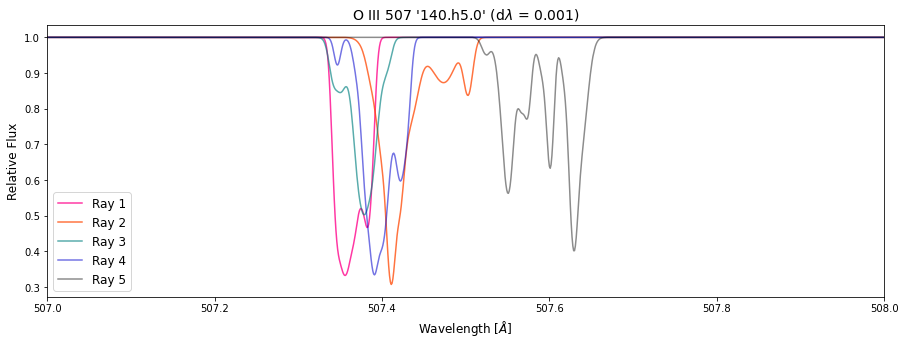

In [48]:
spec(rays, 507, 508, el='O', rom_num='III', lrest=507.3883,
    gamma=1.60E+09, f_value=1.85E-01, DIY=True)

# Al

## Al II 1670

yt : [INFO     ] 2022-06-16 00:07:47,498 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:07:47,511 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2635.70it/s]
yt : [INFO     ] 2022-06-16 00:07:47,659 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:07:47,703 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:07:47,706 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 13379.40it/s]
yt : [INFO     ] 2022-06-16 00:07:47,757 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:07:47,800 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:07:47,803 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9833.34it/s]
yt : [INFO     ] 2022-06-16 00:07:47,857 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:07:47,900 Setting instrument to Custom
yt : 

[array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+0

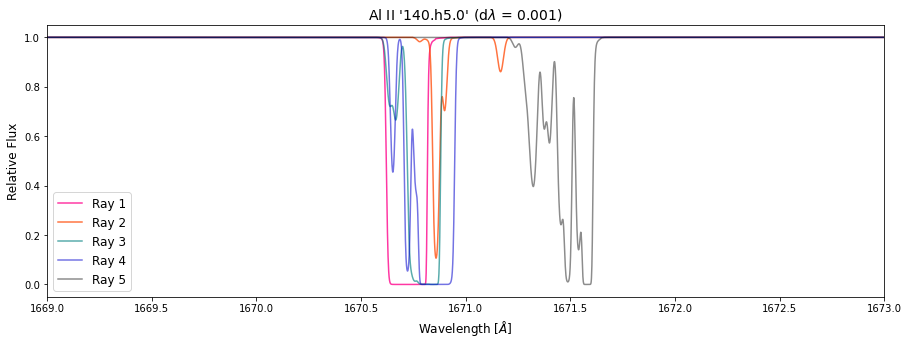

In [52]:
spec(rays, 1669, 1673, line='Al II')

## Al III 1854

yt : [INFO     ] 2022-06-16 00:09:31,990 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:09:32,002 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3433.42it/s]
yt : [INFO     ] 2022-06-16 00:09:32,124 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:09:32,168 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:09:32,171 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 294/294 [00:00<00:00, 15073.78it/s]
yt : [INFO     ] 2022-06-16 00:09:32,221 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:09:32,264 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:09:32,268 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12958.04it/s]
yt : [INFO     ] 2022-06-16 00:09:32,317 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:09:32,360 Setting instrument to Custom
y

[array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+0

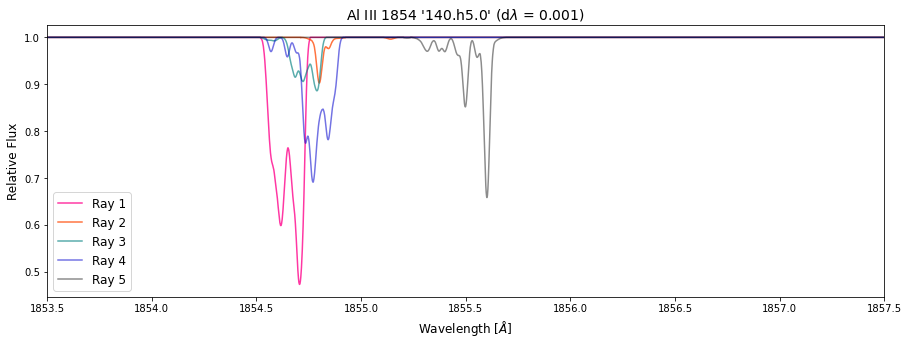

In [54]:
spec(rays, 1853.5,1857.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam=0.001)

## Al IV 160

yt : [INFO     ] 2022-06-16 17:03:05,425 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 17:03:05,437 Creating spectrum
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4230.29it/s]
yt : [INFO     ] 2022-06-16 17:03:05,545 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 17:03:05,575 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 17:03:05,578 Creating spectrum
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 294/294 [00:00<00:00, 19618.26it/s]
yt : [INFO     ] 2022-06-16 17:03:05,623 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 17:03:05,652 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 17:03:05,655 Creating spectrum
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 256/256 [00:00<00:00, 14001.25it/s]
yt : [INFO     ] 2022-06-16 17:03:05,703 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 17:03:05,731 Setting instrument to Custom
yt : [INFO

[array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]])]

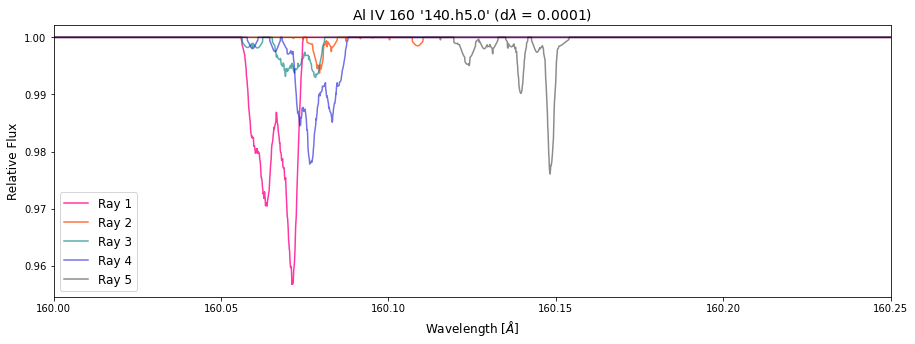

In [10]:
spec(rays, 160,160.25,el='Al',rom_num='IV',lrest=160.0724, 
     gamma=2.13E+10, f_value=2.45E-01, DIY=True, dlam=0.0001)

yt : [INFO     ] 2022-06-16 16:44:33,757 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 16:44:33,767 Creating spectrum
yt : [INFO     ] 2022-06-16 16:44:33,827 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9888.31it/s]
yt : [INFO     ] 2022-06-16 16:44:33,854 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 16:44:33,857 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 16:44:33,861 Creating spectrum
yt : [INFO     ] 2022-06-16 16:44:33,903 20 out of 294 line components will be deposited as unresolved lines.
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 294/294 [00:00<00:00, 15537.40it/s]
yt : [INFO     ] 2022-06-16 16:44:33,923 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 16:44:33,926 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 16:44:33,931 Creating spectrum
yt : [INFO     ] 2022-06-16 16:44:33,9

[array([[160.       , 160.01     , 160.02     , 160.03     , 160.04     ,
         160.05     , 160.06     , 160.07     , 160.08     , 160.09     ,
         160.1      , 160.11     , 160.12     , 160.13     , 160.14     ,
         160.15     , 160.16     , 160.17     , 160.18     , 160.19     ,
         160.2      , 160.21     , 160.22     , 160.23     , 160.24     ,
         160.25     ],
        [  1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           0.9959102,   0.9755583,   0.9860429,   0.9999952,   0.9999994,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ]]),
 array([[160.       , 160.01     , 160.02     , 160.03     , 160.04     ,
         160.05     , 160.06     , 160.07     , 160.08     , 160.09     ,
         160.1      , 160.11     , 160.12     , 160.13     , 160

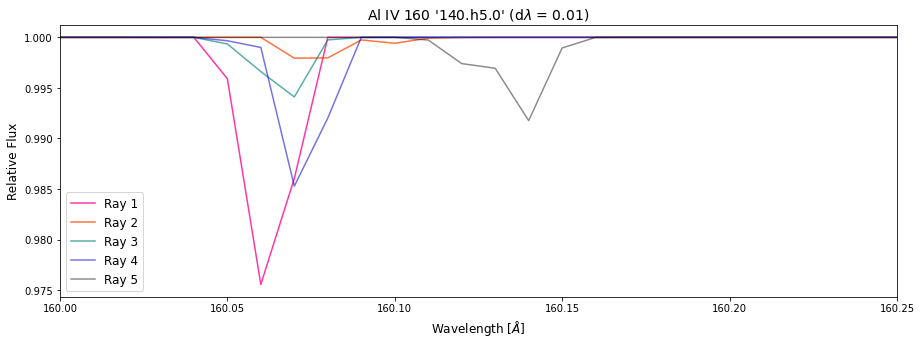

In [9]:
spec(rays, 160,160.25,el='Al',rom_num='IV',lrest=160.0724, 
     gamma=2.13E+10, f_value=2.45E-01, DIY=True, dlam=0.01)

## Al IV 129

yt : [INFO     ] 2022-06-16 00:11:37,467 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:11:37,479 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4106.39it/s]
yt : [INFO     ] 2022-06-16 00:11:37,591 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:11:37,615 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:11:37,618 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 294/294 [00:00<00:00, 15974.16it/s]
yt : [INFO     ] 2022-06-16 00:11:37,669 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:11:37,692 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:11:37,695 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 256/256 [00:00<00:00, 12168.43it/s]
yt : [INFO     ] 2022-06-16 00:11:37,749 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:11:37,772 Setting instrument to Custom
yt : [INFO

[array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]])]

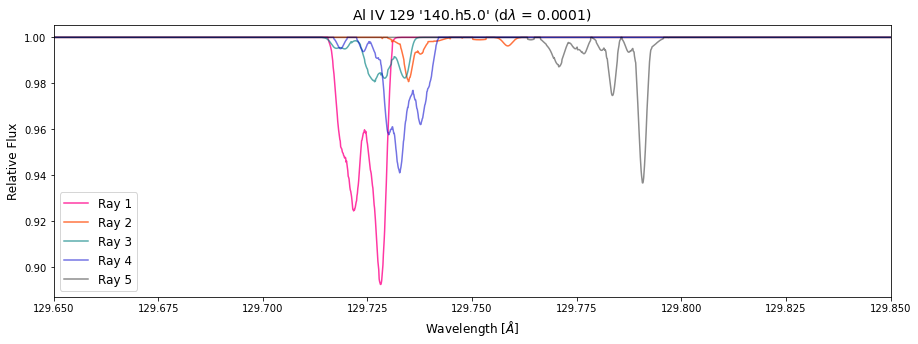

In [57]:
spec(rays, 129.65,129.85,el='Al',rom_num='IV',lrest=129.7291, 
     gamma=1.03E+11, f_value=7.78E-01, DIY=True, dlam=0.0001)

# Fe

## Fe II 2600

yt : [INFO     ] 2022-06-16 00:14:44,423 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:14:44,435 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2501.17it/s]
yt : [INFO     ] 2022-06-16 00:14:44,586 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:14:44,630 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:14:44,633 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 294/294 [00:00<00:00, 14204.88it/s]
yt : [INFO     ] 2022-06-16 00:14:44,683 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:14:44,726 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:14:44,729 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9762.71it/s]
yt : [INFO     ] 2022-06-16 00:14:44,785 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:14:44,829 Setting instrument to Custom
yt : 

[array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+0

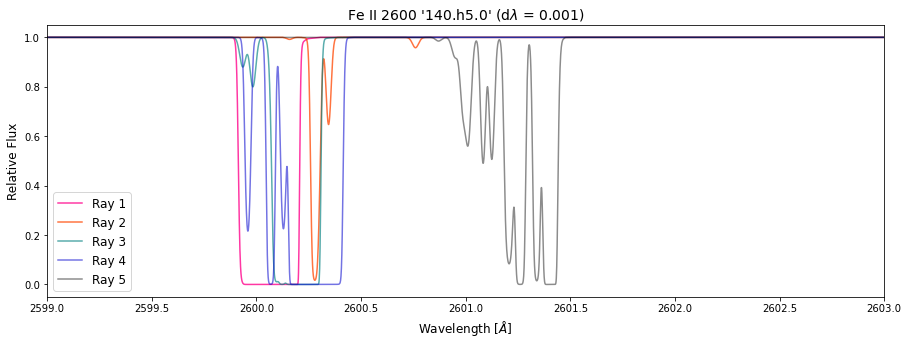

In [59]:
spec(rays, 2599,2603,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True)

## Fe III 1122

yt : [INFO     ] 2022-06-16 00:16:32,456 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:32,469 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3474.30it/s]
yt : [INFO     ] 2022-06-16 00:16:32,591 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:32,634 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:32,637 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 13954.91it/s]
yt : [INFO     ] 2022-06-16 00:16:32,688 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:32,733 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:32,735 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11468.42it/s]
yt : [INFO     ] 2022-06-16 00:16:32,787 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:32,831 Setting instrument to Custom
y

[array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+0

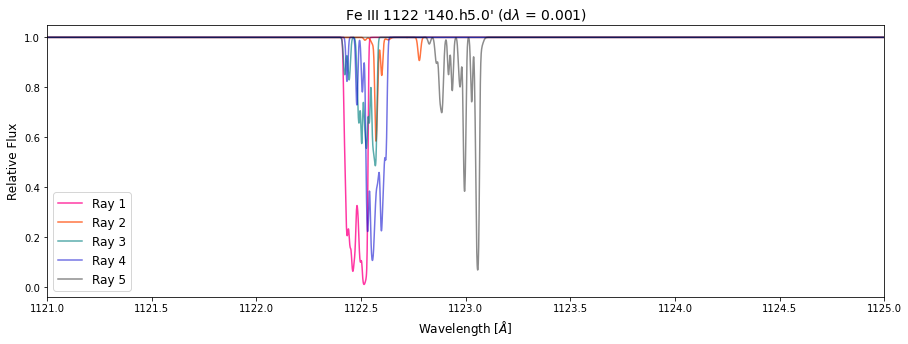

In [61]:
spec(rays, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True)

yt : [INFO     ] 2022-06-16 00:16:52,591 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:52,602 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3684.67it/s]
yt : [INFO     ] 2022-06-16 00:16:52,722 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:52,741 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:52,744 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 13612.46it/s]
yt : [INFO     ] 2022-06-16 00:16:52,800 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:52,818 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:16:52,821 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11603.13it/s]
yt : [INFO     ] 2022-06-16 00:16:52,874 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:16:52,893 Setting instrument to Custom
y

[array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+0

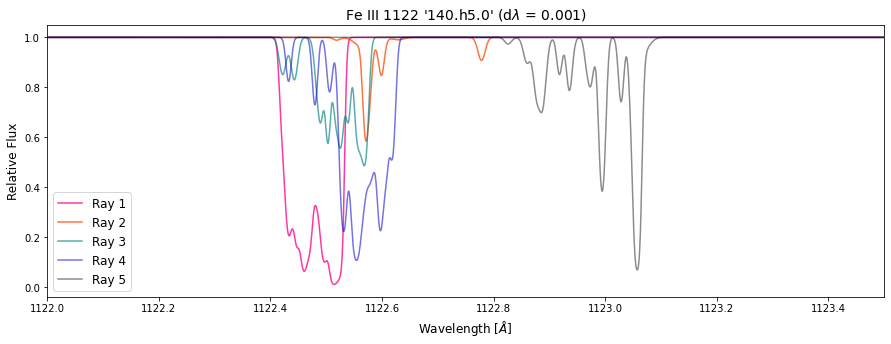

In [62]:
spec(rays, 1122,1123.5,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True)

## Fe IV 526

yt : [INFO     ] 2022-06-16 00:19:25,677 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:19:25,689 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 6129.54it/s]
yt : [INFO     ] 2022-06-16 00:19:25,781 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:19:25,827 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:19:25,830 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 13624.34it/s]
yt : [INFO     ] 2022-06-16 00:19:25,880 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:19:25,923 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:19:25,926 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 15123.76it/s]
yt : [INFO     ] 2022-06-16 00:19:25,973 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:19:26,016 Setting instrument to Custom
yt : [INFO

[array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

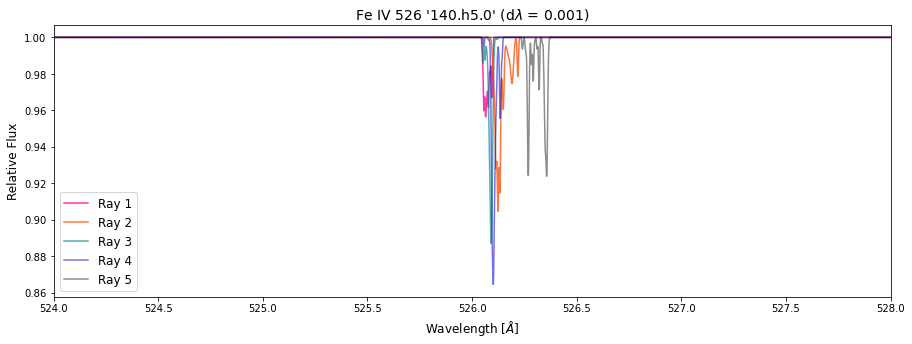

In [67]:
spec(rays, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True)

yt : [INFO     ] 2022-06-16 00:18:56,793 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:18:56,805 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 6109.24it/s]
yt : [INFO     ] 2022-06-16 00:18:56,897 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:18:56,912 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:18:56,916 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 14390.71it/s]
yt : [INFO     ] 2022-06-16 00:18:56,969 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:18:56,983 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:18:56,986 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 15547.28it/s]
yt : [INFO     ] 2022-06-16 00:18:57,034 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:18:57,047 Setting instrument to Custom
yt : [INFO

[array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

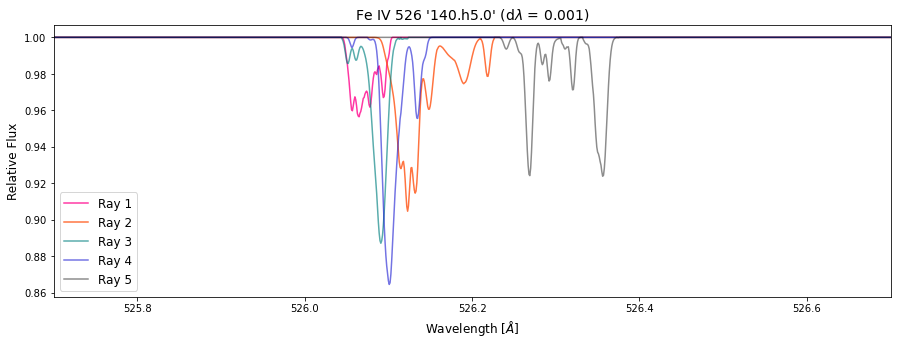

In [66]:
spec(rays, 525.7,526.7,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True)

# Mg

## Mg II 2796

yt : [INFO     ] 2022-06-16 00:21:07,131 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:21:07,143 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1879.52it/s]
yt : [INFO     ] 2022-06-16 00:21:07,328 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:21:07,372 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:21:07,375 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 294/294 [00:00<00:00, 12143.87it/s]
yt : [INFO     ] 2022-06-16 00:21:07,429 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:21:07,472 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:21:07,475 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7553.85it/s]
yt : [INFO     ] 2022-06-16 00:21:07,539 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:21:07,582 Setting instrument to Custom
yt : 

[array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+0

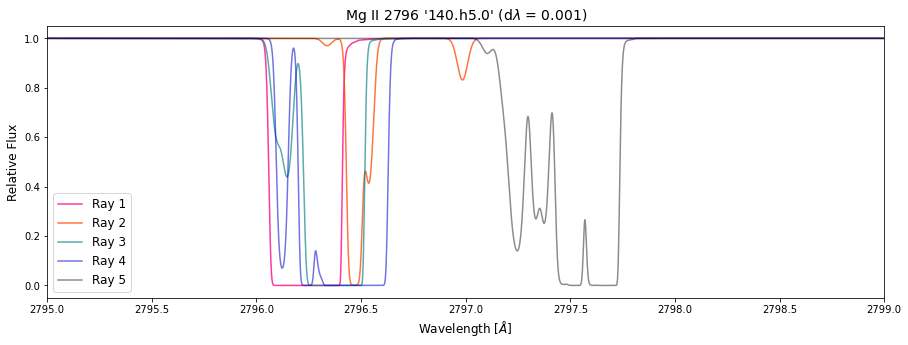

In [69]:
spec(rays, 2795,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True)

## Mg III 231

yt : [INFO     ] 2022-06-16 00:22:52,598 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:52,611 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 4977.16it/s]
yt : [INFO     ] 2022-06-16 00:22:52,711 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:52,756 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:52,758 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 294/294 [00:00<00:00, 16954.84it/s]
yt : [INFO     ] 2022-06-16 00:22:52,807 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:52,850 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:52,853 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 13801.31it/s]
yt : [INFO     ] 2022-06-16 00:22:52,903 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:52,948 Setting instrument to Custom
yt : [I

[array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

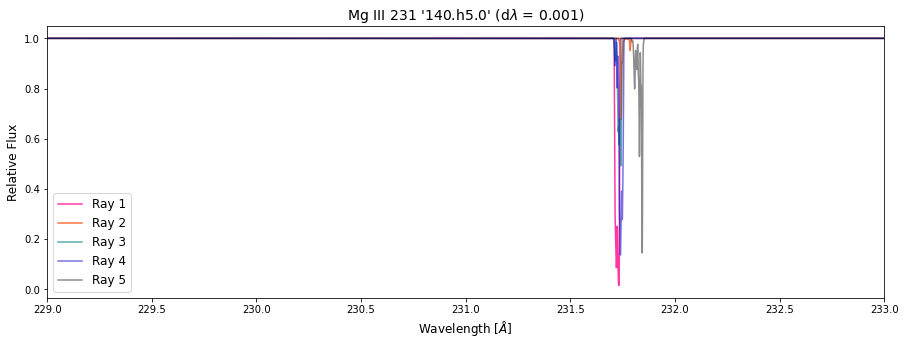

In [72]:
spec(rays, 229,233,
     el='Mg', rom_num='III', lrest=231.7336, gamma=9.90E+09, f_value=2.39E-01, DIY=True)

yt : [INFO     ] 2022-06-16 00:22:12,686 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:12,697 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 4870.33it/s]
yt : [INFO     ] 2022-06-16 00:22:12,799 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:12,806 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:12,810 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 294/294 [00:00<00:00, 16116.97it/s]
yt : [INFO     ] 2022-06-16 00:22:12,860 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:12,868 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:22:12,871 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 14192.23it/s]
yt : [INFO     ] 2022-06-16 00:22:12,921 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:22:12,929 Setting instrument to Custom
yt : [I

[array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

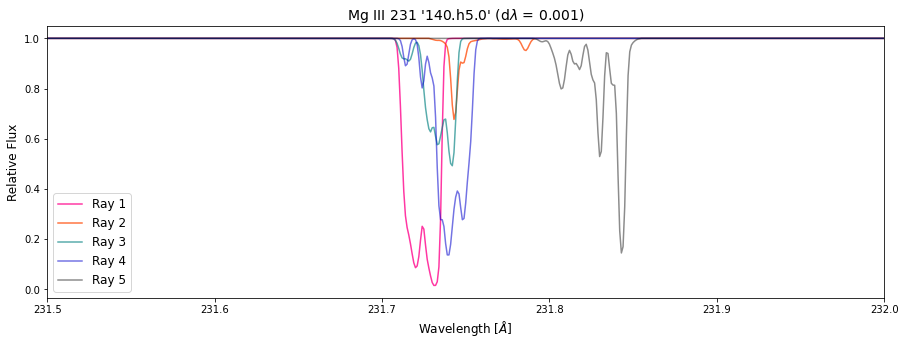

In [71]:
spec(rays, 231.5,232,
     el='Mg', rom_num='III', lrest=231.7336, gamma=9.90E+09, f_value=2.39E-01, DIY=True)

## Mg III 186

yt : [INFO     ] 2022-06-16 00:23:56,980 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:23:56,993 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 2563.28it/s]
yt : [INFO     ] 2022-06-16 00:23:57,141 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:23:57,546 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:23:57,549 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 294/294 [00:00<00:00, 9412.16it/s]
yt : [INFO     ] 2022-06-16 00:23:57,613 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:23:58,030 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:23:58,034 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8864.23it/s]
yt : [INFO     ] 2022-06-16 00:23:58,092 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:23:58,514 Setting instrument to Custom
yt : [INF

[array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]])]

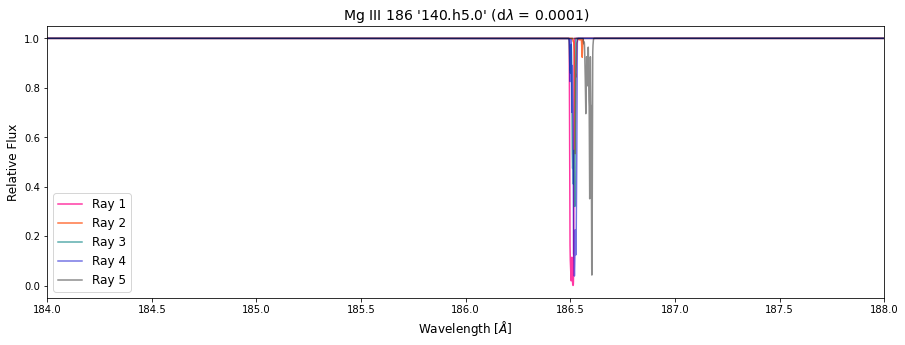

In [74]:
spec(rays, 184,188, 
     el='Mg', rom_num='III', lrest=186.5143, gamma=3.03E+10, f_value=4.74E-01, DIY=True, dlam=0.0001)

yt : [INFO     ] 2022-06-16 00:24:37,800 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:24:37,812 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 2605.04it/s]
yt : [INFO     ] 2022-06-16 00:24:37,961 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:24:38,014 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:24:38,017 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 294/294 [00:00<00:00, 10536.83it/s]
yt : [INFO     ] 2022-06-16 00:24:38,073 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:24:38,128 Setting instrument to Custom
yt : [INFO     ] 2022-06-16 00:24:38,131 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8835.85it/s]
yt : [INFO     ] 2022-06-16 00:24:38,189 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-16 00:24:38,243 Setting instrument to Custom
yt : [IN

[array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]])]

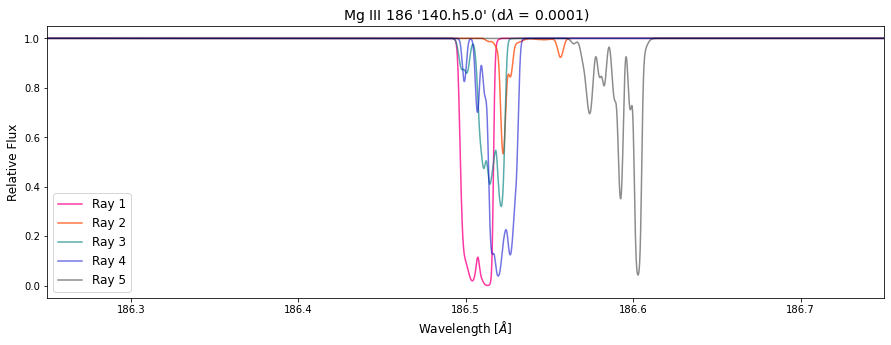

In [77]:
spec(rays, 186.25,186.75,
     el='Mg', rom_num='III', lrest=186.5143, gamma=3.03E+10, f_value=4.74E-01, DIY=True, dlam=0.0001)